In [3]:
import pandas as pd 
import os 
#tv_data_set_path = '\Users\Asus\Downloads\tv_data_set.csv'
df = pd.read_csv('tv_data_set.csv', index_col = False)


In [4]:
#to remove unnamed cols
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,id,image_url,Brand,Manufacturer,Model,Model Year,Product Dimensions,Item model number,Ram Memory Installed Size,Operating System,...,Battery Description,Battery Capacity,Audio Encoding,Audio Input,Imported By,Speakers Maximum Output Power,Speaker Connectivity,Contains Liquid Contents,Item part number,Maximum Memory Supported
0,0,https://m.media-amazon.com/images/I/41Y+SwHCJz...,AmazonBasics,"Veira Electronics Private Limited D-239, SEC-6...",AB55U20PS,2020.0,123.6 x 9.2 x 72.4 cm; 10.3 Kilograms,AB55U20PS,1.5 GB,FireOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,https://images-eu.ssl-images-amazon.com/images...,CROMA,Veira Electronics Pvt.Ltd,CREL032HOF024601,2022.0,8.51 x 72.01 x 42.01 cm; 6.5 Kilograms,CREL032HOF024601,1 GB,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,https://images-eu.ssl-images-amazon.com/images...,Redmi,Redmi,L32M6-RA/L32M7-RA,2021.0,73 x 8.7 x 47.6 cm; 3.92 Kilograms,L32M6-RA/L32M7-RA,1 GB,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,https://m.media-amazon.com/images/I/41fVP+e7Cz...,OnePlus,Radiant Appliances and Electronics Pvt. Ltd.,32Y1,2020.0,6.5 x 42 x 71.3 cm; 3.5 Kilograms,32Y1,1 GB,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,https://images-eu.ssl-images-amazon.com/images...,MI,DIXON TECHNOLOGIES (INDIA) LIMITED,L43M6-INC,2021.0,96.7 x 8.3 x 56 cm; 5.48 Kilograms,L43M6-INC,1 GB,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(321, 76)

In [6]:
df.isnull().sum()

id                                 0
image_url                          0
Brand                              0
Manufacturer                       0
Model                             22
                                ... 
Speakers Maximum Output Power    316
Speaker Connectivity             317
Contains Liquid Contents         319
Item part number                 315
Maximum Memory Supported         320
Length: 76, dtype: int64

In [7]:
def null_percentage(df):

    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
    missing_value_df.reset_index(inplace=True)
    missing_value_df.columns = ['column_name','percent_missing']
    missing_value_df = missing_value_df.sort_values('percent_missing',)

    return missing_value_df

In [8]:
missing_value_df = null_percentage(df)
missing_value_df

,column_name,percent_missing
0,id,0.000000
1,image_url,0.000000
2,Brand,0.000000
3,Manufacturer,0.000000
31,product,0.000000
...,...,...
62,Battery Power Rating,99.688474
67,Battery Capacity,99.688474
68,Audio Encoding,99.688474
70,Imported By,99.688474


In [9]:
##considering only the features which has data greater than 70
missing_value_df = missing_value_df[missing_value_df['percent_missing']<70]

In [10]:
required_columns = list(missing_value_df.column_name)

In [11]:

df = df[required_columns]
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()


In [12]:
# df.drop(['manufacturer',], axis=1)
print(df.dtypes)

id                                                int64
image_url                                        object
brand                                            object
manufacturer                                     object
product                                          object
product_url                                      object
price                                            object
resolution                                       object
connector_type                                   object
rating                                           object
standing_screen_display_size                     object
display_technology                               object
display_type                                     object
number_of_items                                 float64
operating_system                                 object
mounting_hardware                                object
item_weight                                      object
model_year                                      

In [13]:
df.head()


,id,image_url,brand,manufacturer,product,product_url,price,resolution,connector_type,rating,...,remote_control_type,battery_cell_composition,special_features,memory_storage_capacity,image_contrast_ratio,response_time,media_format,includes_rechargable_battery,image_brightness,real_angle_of_view
0,0,https://m.media-amazon.com/images/I/41Y+SwHCJz...,AmazonBasics,"Veira Electronics Private Limited D-239, SEC-6...",AmazonBasics 139 cm (55 inches) 4K Ultra HD Sm...,https://amazon.in/gp/slredirect/picassoRedirec...,"36,499",3840x2160 Pixels,Wi-Fi,4.0 out of 5 stars,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,https://images-eu.ssl-images-amazon.com/images...,CROMA,Veira Electronics Pvt.Ltd,Croma 80 cm (32 Inches) HD Ready Certified And...,https://amazon.in/gp/slredirect/picassoRedirec...,"12,490",1366768 Pixels,HDMI,4.4 out of 5 stars,...,NaN,Alkaline,NaN,8 GB,3000:01,NaN,NaN,NaN,NaN,NaN
2,2,https://images-eu.ssl-images-amazon.com/images...,Redmi,Redmi,Redmi 80 cm (32 inches) Android 11 Series HD R...,https://amazon.in/Redmi-inches-Ready-L32M6-RA-...,"14,999",1366 x 768 Pixels,"Wi-Fi, USB, Ethernet, HDMI",4.2 out of 5 stars,...,Bluetooth,NaN,PatchWall 4 with IMDb Integration | Kids Mode ...,8 GB,NaN,NaN,"AVI, MPEG",NaN,Ultra Bright Screen,178 Degrees
3,3,https://m.media-amazon.com/images/I/41fVP+e7Cz...,OnePlus,Radiant Appliances and Electronics Pvt. Ltd.,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,https://amazon.in/OnePlus-inches-Ready-Android...,"14,999",1366x768 Pixels,Wi-Fi,4.2 out of 5 stars,...,"IR, Bluetooth",Alkaline,NaN,NaN,5000:1,NaN,"AVI, DVD, MPEG, WAV, WMA",NaN,High brightness,NaN
4,4,https://images-eu.ssl-images-amazon.com/images...,MI,DIXON TECHNOLOGIES (INDIA) LIMITED,Mi 108 cm (43 inches) Full HD Android LED TV 4...,https://amazon.in/inches-Full-Android-L43M6-IN...,"22,999",1920x1080 Pixels,"Wi-Fi, USB, Ethernet, HDMI",4.3 out of 5 stars,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
default = ['id','image_url','product','product_url',]


FEATURES_SELECTED_BY_SME = ['price','refresh_rate','display_type','audio_wattage','maximum_operating_distance','brand','resolution','rating',
'standing_screen_display_size','display_technology','item_weight','wattage','supports_bluetooth_technology']

vector_length = len(FEATURES_SELECTED_BY_SME)


ALL_COLUMNS = FEATURES_SELECTED_BY_SME + default
df = df.loc[:,ALL_COLUMNS]

df

,price,refresh_rate,display_type,audio_wattage,maximum_operating_distance,brand,resolution,rating,standing_screen_display_size,display_technology,item_weight,wattage,supports_bluetooth_technology,id,image_url,product,product_url
0,"36,499",60 Hz,LED,NaN,NaN,AmazonBasics,3840x2160 Pixels,4.0 out of 5 stars,55 Inches,LED,10 kg 300 g,NaN,Yes,0,https://m.media-amazon.com/images/I/41Y+SwHCJz...,AmazonBasics 139 cm (55 inches) 4K Ultra HD Sm...,https://amazon.in/gp/slredirect/picassoRedirec...
1,"12,490",60 Hz,LED,20 Watts,NaN,CROMA,1366768 Pixels,4.4 out of 5 stars,32 Inches,LED,6 kg 500 g,NaN,NaN,1,https://images-eu.ssl-images-amazon.com/images...,Croma 80 cm (32 Inches) HD Ready Certified And...,https://amazon.in/gp/slredirect/picassoRedirec...
2,"14,999",60 Hz,A+,20 Watts,8 Feet,Redmi,1366 x 768 Pixels,4.2 out of 5 stars,32 Inches,LED,3 kg 920 g,50 Watts,Yes,2,https://images-eu.ssl-images-amazon.com/images...,Redmi 80 cm (32 inches) Android 11 Series HD R...,https://amazon.in/Redmi-inches-Ready-L32M6-RA-...
3,"14,999",60 Hz,LED,20 Watts,9 Feet,OnePlus,1366x768 Pixels,4.2 out of 5 stars,32 Inches,LED,3 kg 500 g,20.00,Yes,3,https://m.media-amazon.com/images/I/41fVP+e7Cz...,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,https://amazon.in/OnePlus-inches-Ready-Android...
4,"22,999",60 Hz,Dynamic Backlight,20 Watts,NaN,MI,1920x1080 Pixels,4.3 out of 5 stars,43 Inches,LED,5 kg 480 g,75 Watts,Yes,4,https://images-eu.ssl-images-amazon.com/images...,Mi 108 cm (43 inches) Full HD Android LED TV 4...,https://amazon.in/inches-Full-Android-L43M6-IN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,"56,999",60 Hz,A+ Grade,24 Watts,NaN,IFFALCON,3840 x 2160 Pixels,4.3 out of 5 stars,65 Inches,LED,17 kg 300 g,24 Watts,Yes,78,https://images-eu.ssl-images-amazon.com/images...,iFFALCON 164 cm (65 inches) 4K Ultra HD Certif...,https://amazon.in/iFFALCON-inches-Certified-An...
317,"18,490",50 Hz,IPS,10 Watts,8 Feet,LG,1366x768 Pixels,4.3 out of 5 stars,32 Inches,LED,19 kg 100 g,10.00,No,79,https://images-eu.ssl-images-amazon.com/images...,LG 80 cms (32 Inches) HD Ready Smart IPS LED T...,https://amazon.in/LG-Inches-Ready-32LM560BPTC-...
318,"10,499",60 Hz,LED,NaN,NaN,Imee,1366768 Pixels,1.0 out of 5 stars,32 Inches,LED,NaN,50 Watts,NaN,80,https://images-eu.ssl-images-amazon.com/images...,iMee 80cm (32 inch) Elite Series Smart Framele...,https://amazon.in/Elite-Smart-Frameless-Black-...
319,"8,990",60 Hz,A+,20 Watts,9 Feet,Karbonn,1366x768 Pixels,4.4 out of 5 stars,32 Inches,LED,4 kg 400 g,60 Watts,No,81,https://images-eu.ssl-images-amazon.com/images...,Karbonn 80 cm (32 Inches) Millennium Series HD...,https://amazon.in/gp/slredirect/picassoRedirec...


In [15]:
missing_value_df = null_percentage(df)
missing_value_df

,column_name,percent_missing
0,price,0.000000
14,image_url,0.000000
13,id,0.000000
15,product,0.000000
6,resolution,0.000000
16,product_url,0.000000
5,brand,0.000000
7,rating,0.311526
9,display_technology,0.311526
8,standing_screen_display_size,0.311526


In [16]:
import re 
import numpy as np 

def extract_data_before_first_space(string):
    if string is not np.NaN:
        return float(re.split(" +", str(string))[0])
    return string
    
    
def remove_word_from_string(string,word):
    words =string.split(word)
    words = [i.strip() for i in words]
    return ' '.join(words).strip()



def weight_processor(weight_string):
    """
    takes - weight_string
        ex: 1 kg 200 g, 
    returns - weight in kg with no units
        ex: 1.2000
    """
    # can handle, 1 kg 200 g, 1.2 kg 
    pattern1 = r".*(\b\d+).*(\b\d+).*"
    # can handle 1 kg, 2 kg
    pattern2 = r".*(\b\d+).*"

    result_pat1 = re.search(pattern1, weight_string)

    if result_pat1:
        groups = result_pat1.groups()
        kg = float(groups[0])
        gm = float(groups[1])
        return kg + gm / 1000
        # return float(groups[0] + "." + groups[1])
    
    result_pat2 = re.search(pattern2, weight_string)

    if result_pat2:
        groups = result_pat2.groups()
        weight = float(groups[0])
        if weight > 100:
            return weight / 1000
        return float(weight)

In [17]:
def resolution_process(resolution_string):
    if 'x' in resolution_string:
        [i,j] = resolution_string.split('x',2)
        res = float(i)*float(j)
        return(res)
    return None

In [18]:
## preprocessing of columns
df['rating'] = df['rating'].apply(lambda x: extract_data_before_first_space(x))
df['refresh_rate'] = df['refresh_rate'].apply(lambda x: extract_data_before_first_space(x))
df ['audio_wattage'] = df['audio_wattage'].apply(lambda x: extract_data_before_first_space(x))
df ['resolution'] = df['resolution'].apply(lambda x : remove_word_from_string(x,'Pixels'))
df['standing_screen_display_size'] = df['standing_screen_display_size'].apply(extract_data_before_first_space)
df['maximum_operating_distance'] = df['maximum_operating_distance'].apply(extract_data_before_first_space)
df['wattage'] = df['wattage'].apply(extract_data_before_first_space)
df['item_weight'] = df['item_weight'].apply(lambda x: weight_processor(str(x)))
df['resolution'] = df['resolution'].apply(lambda x: resolution_process(str(x)))
df['price'] = df['price'].str.replace(',', '').astype('float')


In [19]:
df

,price,refresh_rate,display_type,audio_wattage,maximum_operating_distance,brand,resolution,rating,standing_screen_display_size,display_technology,item_weight,wattage,supports_bluetooth_technology,id,image_url,product,product_url
0,36499.0,60.0,LED,NaN,NaN,AmazonBasics,8294400.0,4.0,55.0,LED,10.30,NaN,Yes,0,https://m.media-amazon.com/images/I/41Y+SwHCJz...,AmazonBasics 139 cm (55 inches) 4K Ultra HD Sm...,https://amazon.in/gp/slredirect/picassoRedirec...
1,12490.0,60.0,LED,20.0,NaN,CROMA,NaN,4.4,32.0,LED,6.50,NaN,NaN,1,https://images-eu.ssl-images-amazon.com/images...,Croma 80 cm (32 Inches) HD Ready Certified And...,https://amazon.in/gp/slredirect/picassoRedirec...
2,14999.0,60.0,A+,20.0,8.0,Redmi,1049088.0,4.2,32.0,LED,3.92,50.0,Yes,2,https://images-eu.ssl-images-amazon.com/images...,Redmi 80 cm (32 inches) Android 11 Series HD R...,https://amazon.in/Redmi-inches-Ready-L32M6-RA-...
3,14999.0,60.0,LED,20.0,9.0,OnePlus,1049088.0,4.2,32.0,LED,3.50,20.0,Yes,3,https://m.media-amazon.com/images/I/41fVP+e7Cz...,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,https://amazon.in/OnePlus-inches-Ready-Android...
4,22999.0,60.0,Dynamic Backlight,20.0,NaN,MI,2073600.0,4.3,43.0,LED,5.48,75.0,Yes,4,https://images-eu.ssl-images-amazon.com/images...,Mi 108 cm (43 inches) Full HD Android LED TV 4...,https://amazon.in/inches-Full-Android-L43M6-IN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,56999.0,60.0,A+ Grade,24.0,NaN,IFFALCON,8294400.0,4.3,65.0,LED,17.30,24.0,Yes,78,https://images-eu.ssl-images-amazon.com/images...,iFFALCON 164 cm (65 inches) 4K Ultra HD Certif...,https://amazon.in/iFFALCON-inches-Certified-An...
317,18490.0,50.0,IPS,10.0,8.0,LG,1049088.0,4.3,32.0,LED,19.10,10.0,No,79,https://images-eu.ssl-images-amazon.com/images...,LG 80 cms (32 Inches) HD Ready Smart IPS LED T...,https://amazon.in/LG-Inches-Ready-32LM560BPTC-...
318,10499.0,60.0,LED,NaN,NaN,Imee,NaN,1.0,32.0,LED,NaN,50.0,NaN,80,https://images-eu.ssl-images-amazon.com/images...,iMee 80cm (32 inch) Elite Series Smart Framele...,https://amazon.in/Elite-Smart-Frameless-Black-...
319,8990.0,60.0,A+,20.0,9.0,Karbonn,1049088.0,4.4,32.0,LED,4.40,60.0,No,81,https://images-eu.ssl-images-amazon.com/images...,Karbonn 80 cm (32 Inches) Millennium Series HD...,https://amazon.in/gp/slredirect/picassoRedirec...


In [20]:
df.isnull().sum()

price                              0
refresh_rate                       3
display_type                       2
audio_wattage                     44
maximum_operating_distance       116
brand                              0
resolution                        43
rating                             1
standing_screen_display_size       1
display_technology                 1
item_weight                        3
wattage                           56
supports_bluetooth_technology     44
id                                 0
image_url                          0
product                            0
product_url                        0
dtype: int64

In [21]:
##filling null values 

df['refresh_rate'] = df['refresh_rate'].fillna(df['refresh_rate'].median())
df['display_type']= df['display_type'].fillna(df['display_type'].mode()[0])
df['audio_wattage'] = df['audio_wattage'].fillna(df['audio_wattage'].mean())
df['maximum_operating_distance'] = df['maximum_operating_distance'].fillna(df['maximum_operating_distance'].mean())
df['resolution'] = df['resolution'].fillna(df['resolution'].mean())
df['rating'] = df['rating'].fillna(df['rating'].median())
df['standing_screen_display_size'] = df['standing_screen_display_size'].fillna(df['standing_screen_display_size'].mean())
df['display_technology'] = df['display_technology'].fillna(df['display_technology'].mode()[0])
df['wattage'] = df['wattage'].fillna(df['wattage'].median())
df['item_weight'] = df['item_weight'].fillna(df['item_weight'].mean())
df['supports_bluetooth_technology'] = df['supports_bluetooth_technology'].fillna(df['supports_bluetooth_technology'].mode()[0])




df.describe()

In [22]:
print(FEATURES_SELECTED_BY_SME)

['price', 'refresh_rate', 'display_type', 'audio_wattage', 'maximum_operating_distance', 'brand', 'resolution', 'rating', 'standing_screen_display_size', 'display_technology', 'item_weight', 'wattage', 'supports_bluetooth_technology']


In [23]:
##to infer the filter datatype from column
filters_data_types = {}
for i in FEATURES_SELECTED_BY_SME:
    if df[i].dtype == float or df[i].dtype == int:
        filters_data_types[i]= 'numeric'
    elif df[i].value_counts().size == 2:
        filters_data_types[i] ='boolean'
    else:
        filters_data_types[i]='enum'

In [24]:
filters_data_types

{'price': 'numeric',
 'refresh_rate': 'numeric',
 'display_type': 'enum',
 'audio_wattage': 'numeric',
 'maximum_operating_distance': 'numeric',
 'brand': 'enum',
 'resolution': 'numeric',
 'rating': 'numeric',
 'standing_screen_display_size': 'numeric',
 'display_technology': 'enum',
 'item_weight': 'numeric',
 'wattage': 'numeric',
 'supports_bluetooth_technology': 'boolean'}

In [25]:
features_with_numerics = [i for i in filters_data_types if filters_data_types[i]=='numeric']
features_with_numerics

['price',
 'refresh_rate',
 'audio_wattage',
 'maximum_operating_distance',
 'resolution',
 'rating',
 'standing_screen_display_size',
 'item_weight',
 'wattage']

<AxesSubplot:>

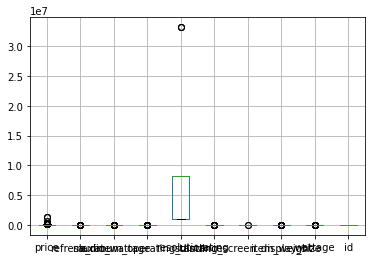

In [26]:
import seaborn as sns 
# df = df.loc[:,features_with_numerics[3:5]]
df.boxplot()

In [27]:

# np.random.seed([3,1415])
# df = pd.DataFrame(dict(
#         Name='matt joe adam farley'.split() * 100,
#         Seconds=np.random.randint(4000, 5000, 400)
#     ))

# df

# df['Zscore'] = df.groupby('Name').Seconds.apply(lambda x: x.div(x.mean()))

# df
# df.groupby('Name').Zscore.plot.kde()

In [28]:
df.price.describe()

count    3.210000e+02
mean     5.217631e+04
std      1.321661e+05
min      8.990000e+03
25%      1.399000e+04
50%      2.699000e+04
75%      4.499000e+04
max      1.282490e+06
Name: price, dtype: float64

<AxesSubplot:ylabel='price'>

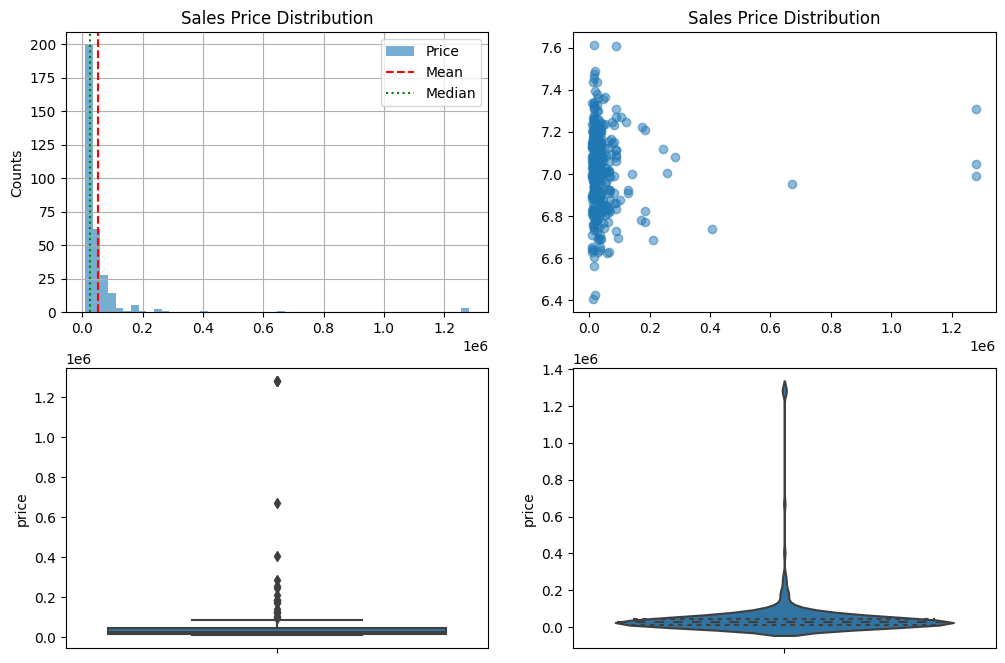

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
df['price'].hist(bins=50, label='Price', alpha=0.6)
plt.axvline(np.mean(df['price']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df['price']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Sales Price Distribution")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df['price'], np.random.normal(7, 0.2, size=df.shape[0]), alpha=0.5)
plt.title("Sales Price Distribution")

plt.subplot(2, 2, 3)
sns.boxplot(y="price", data=df)

plt.subplot(2, 2, 4)
sns.violinplot(y="price", data=df, inner="quartile", bw=0.2)

In [30]:
from scipy.stats import norm
from scipy.stats import multivariate_normal as mn

def z_score(df, threshold=1):
    mean, std = np.mean(df), np.std(df)
    z_score = np.abs((df - mean) / std)
    good = z_score < threshold
    print(f"z-score of {threshold} corresponds to a prob of {100 * 2 * norm.sf(3):0.2f}%")
    print(f"Rejection {(~good).sum()} points")
    return good

z-score of 2 corresponds to a prob of 0.27%
Rejection 5 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 4 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 4 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 3 points


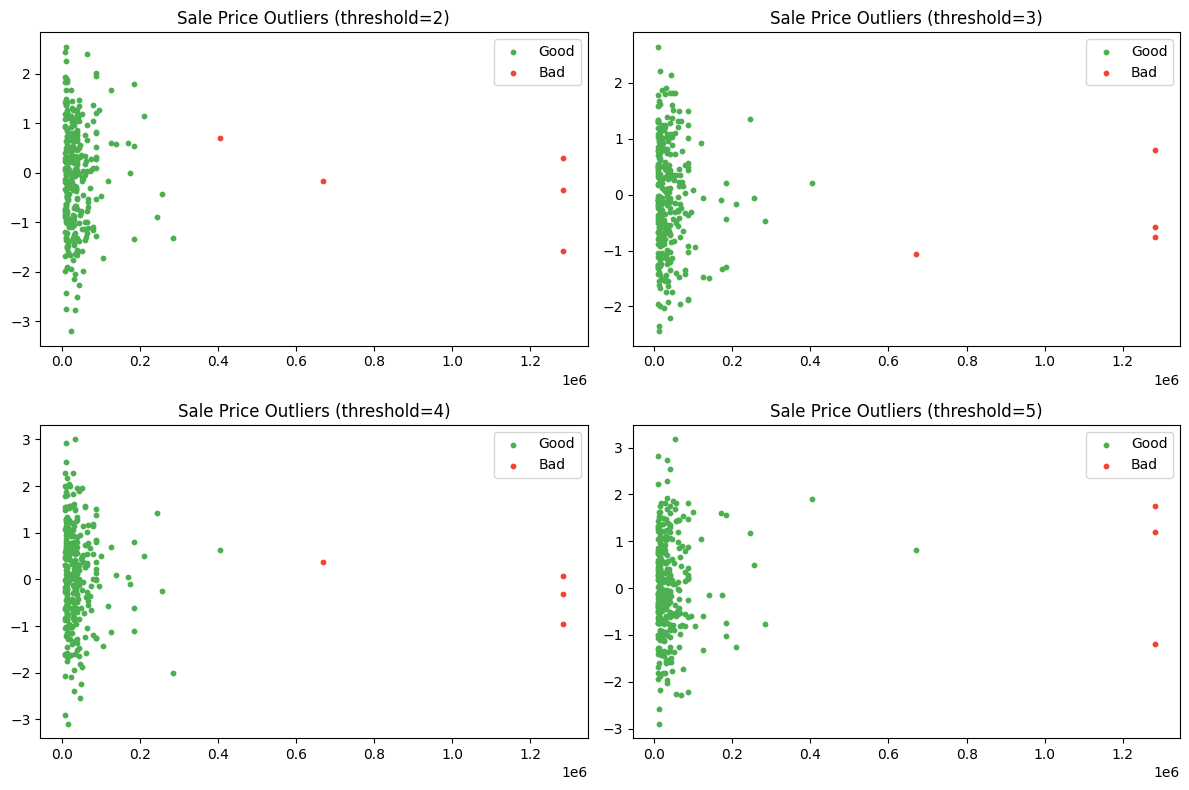

In [31]:
plt.figure(figsize=(12, 8))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=df.shape[0])
    good = z_score(df['price'], threshold=threshold)
    plt.scatter(df['price'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(df['price'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"Sale Price Outliers (threshold={threshold})")

plt.tight_layout()